In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
linearsep=pd.read_csv(r"C:\Users\HP\Downloads\Multiple CSV\Multiple CSV\4.linearsep.csv",header=None)

In [5]:
linearsep

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0
...,...,...,...
95,2.632382,1.271305,0.0
96,-0.040256,1.782708,1.0
97,-0.787453,1.400357,1.0
98,2.702441,1.587444,0.0


In [7]:
fv=linearsep.iloc[:,:2]
cv=linearsep.iloc[:,-1]

In [8]:
fv

,0,1
0,-0.177497,0.930496
1,1.977424,1.766155
2,1.800024,1.700343
3,-0.770837,2.359163
4,-0.308009,1.594063
...,...,...
95,2.632382,1.271305
96,-0.040256,1.782708
97,-0.787453,1.400357
98,2.702441,1.587444


In [9]:
cv

0     1.0
1     0.0
2     0.0
3     1.0
4     1.0
     ... 
95    0.0
96    1.0
97    1.0
98    0.0
99    1.0
Name: 2, Length: 100, dtype: float64

In [10]:
std=StandardScaler()
train_fv=std.fit_transform(fv)

In [11]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_fv,cv.astype(int))

KNeighborsClassifier(n_neighbors=1)

<Axes: >

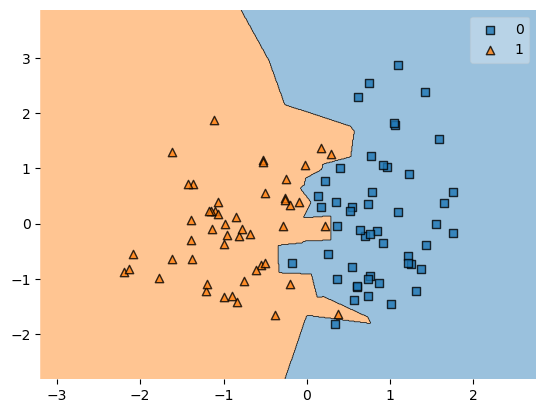

In [12]:
plot_decision_regions(X=train_fv,y=cv.astype(int).values,clf=knn)

<Axes: >

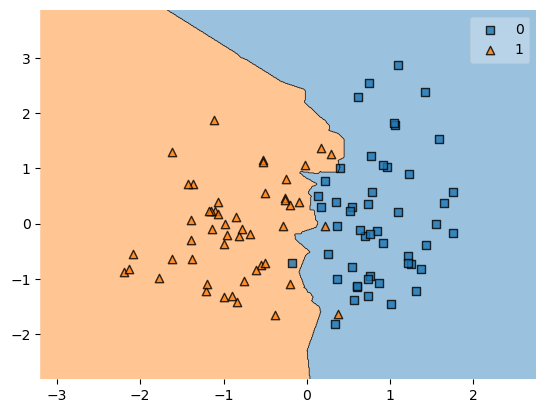

In [13]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_fv,cv.astype(int))
plot_decision_regions(X=train_fv,y=cv.astype(int).values,clf=knn)

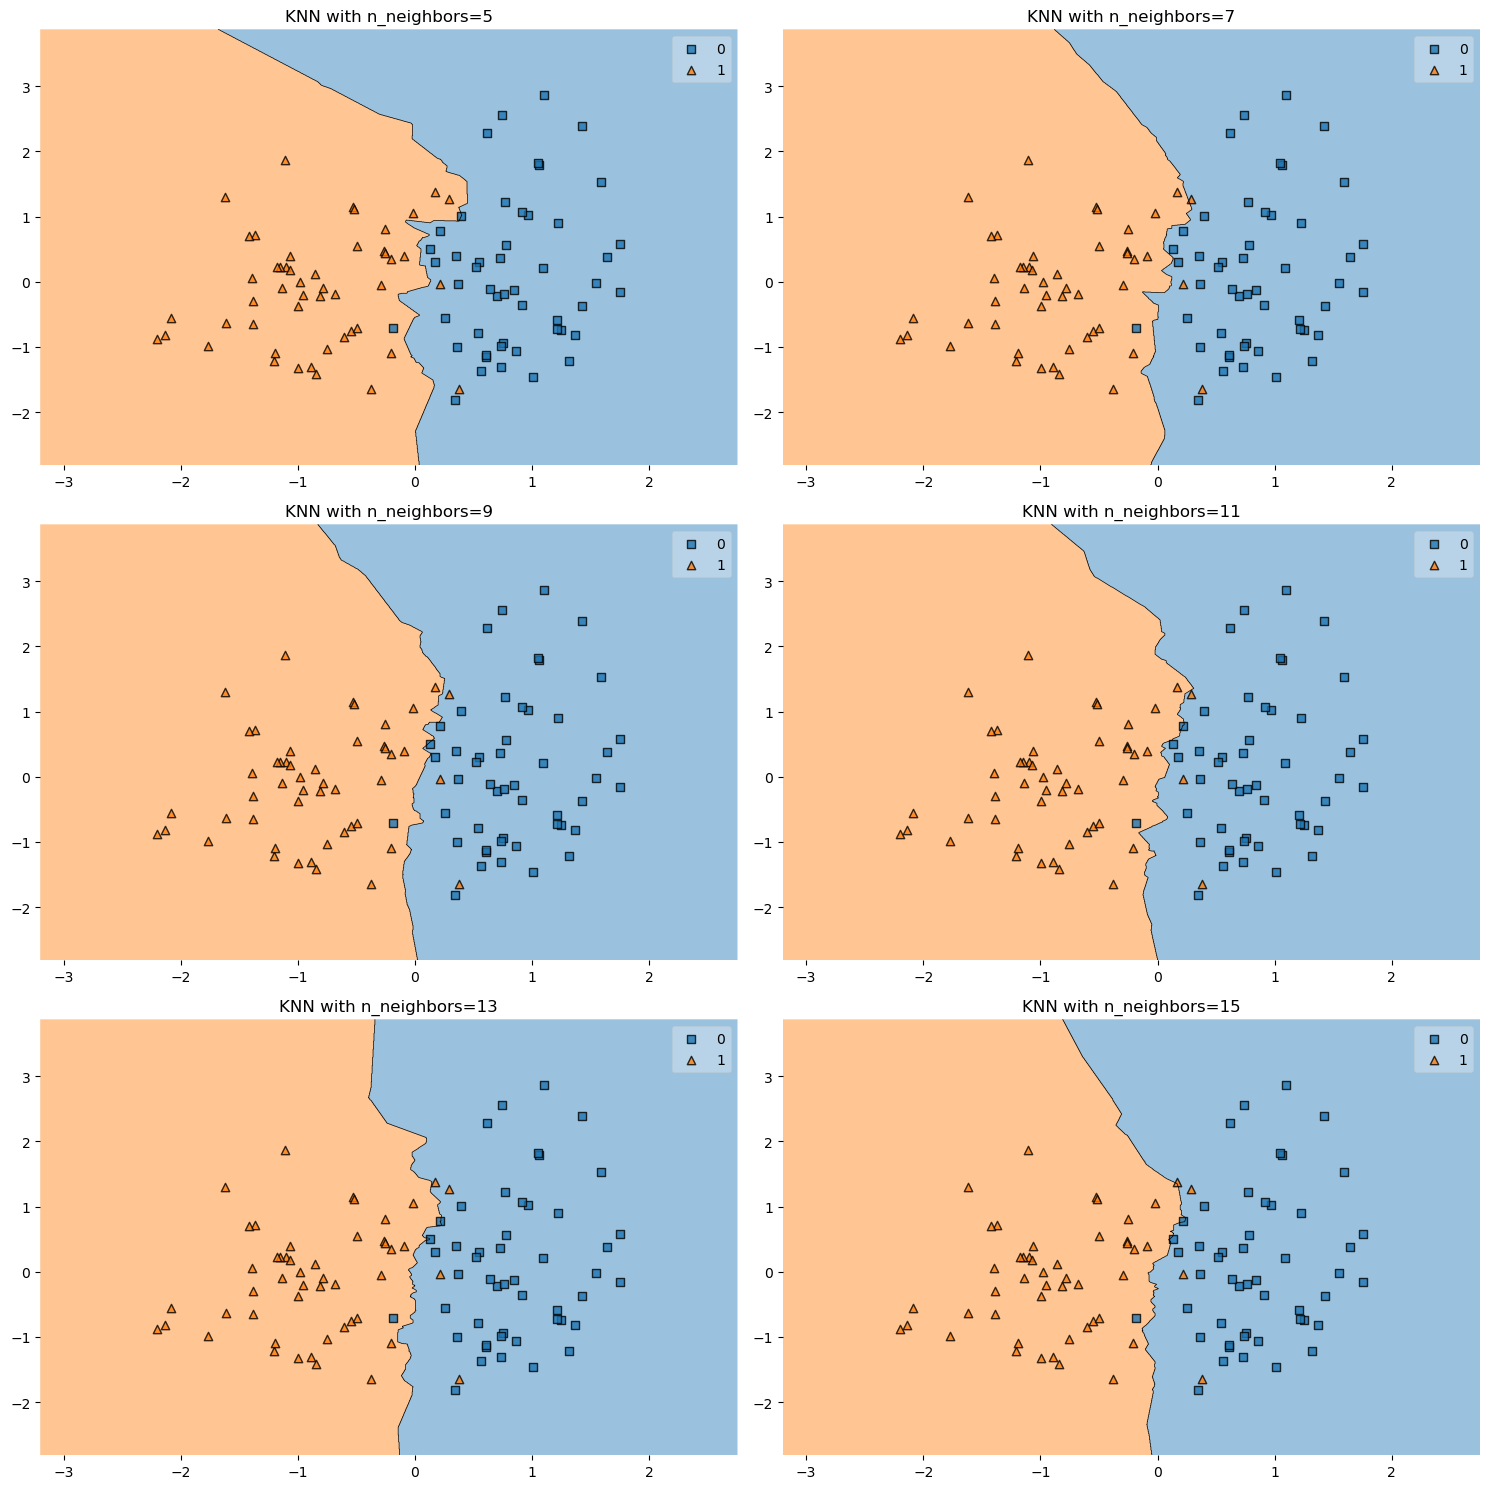

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(5,16, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_fv, cv.astype(int))
    plot_decision_regions(X=train_fv, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

In [14]:
linearsep

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0
...,...,...,...
95,2.632382,1.271305,0.0
96,-0.040256,1.782708,1.0
97,-0.787453,1.400357,1.0
98,2.702441,1.587444,0.0


In [15]:
fv=linearsep.iloc[:,:2]
cv=linearsep.iloc[:,-1]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,train_size=0.8,random_state=10,stratify=cv)

In [17]:
std=StandardScaler()
stand_x_train=std.fit_transform(x_train)
stand_x_test=std.transform(x_test)

In [18]:
knn=KNeighborsClassifier(n_neighbors=1)
learned_knn=knn.fit(stand_x_train,y_train)

In [19]:
predicted=learned_knn.predict(stand_x_test)

In [20]:
predicted

array([0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0.])

In [21]:
accuracy_score(y_test,predicted)

0.9

In [23]:
k=[]
accu=[]
error=[]
for n in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    learned_knn=knn.fit(stand_x_train,y_train)
    predicted=learned_knn.predict(stand_x_test)
    k.append(n)
    accu.append(accuracy_score(y_test,predicted))
    error.append(1-accuracy_score(y_test,predicted))

In [24]:
k

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [25]:
accu

[0.9,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95]

In [26]:
error

[0.09999999999999998,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044]

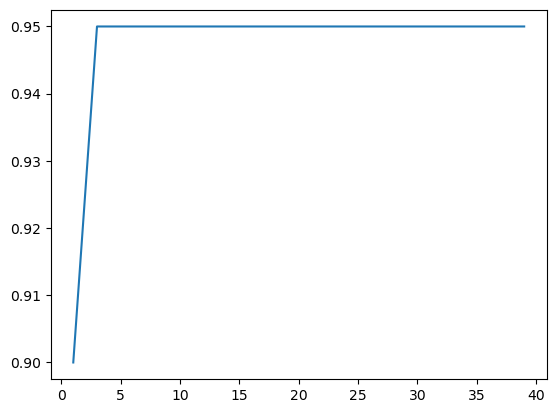

In [27]:
plt.plot(k,accu)

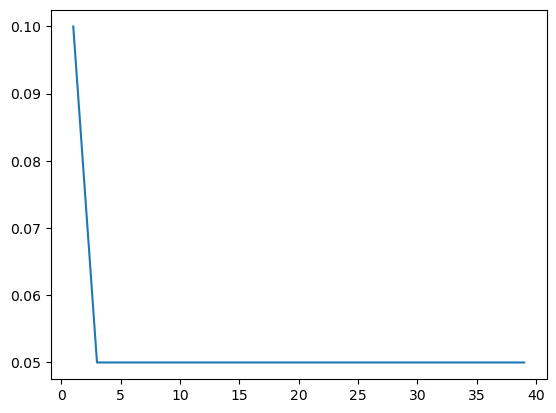

In [28]:
plt.plot(k,error)